# Wczytanie bibliotek i danych

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('data1.csv', header=None, names= ['data1'])

In [3]:
df.head()

,data1
0,587.55
1,587.55
2,827.10
3,70.81
4,81.02


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data1   86 non-null     float64
dtypes: float64(1)
memory usage: 936.0 bytes


W danych mamy jedną kolumnę ze 101 wpisami, w których 15 to brakujące wartości.

# Punkt 1

In [5]:
df1 = df.dropna()

In [6]:
mean_value1 = df1.mean()
std1 = df1.std()
print(mean_value1)
print(std1)

data1    411.18314
dtype: float64
data1    257.607271
dtype: float64


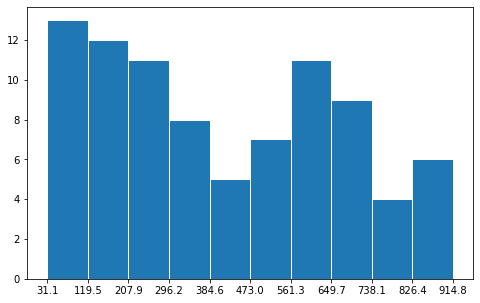

In [7]:
fig, ax = plt.subplots(figsize=(8, 5))
h_vals, h_bins, h_bars = ax.hist(df1["data1"], edgecolor="white")
ax.set_xticks(h_bins)
plt.show()

# Punkt 2

In [8]:
df2 = df.fillna(value = mean_value1)

In [9]:
mean_value2 = df2.mean()
std2 = df2.std()
print(mean_value2)
print(std2)

data1    411.18314
dtype: float64
data1    237.502169
dtype: float64


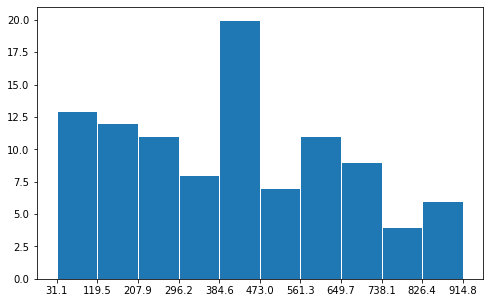

In [10]:
fig, ax = plt.subplots(figsize=(8, 5))
h_vals, h_bins, h_bars = ax.hist(df2["data1"], edgecolor="white")
ax.set_xticks(h_bins)
plt.show()

# Punkt 3

In [11]:
df3 = df.applymap(lambda l: l if not np.isnan(l) else np.random.choice(df1['data1']))

In [12]:
mean_value3 = df3.mean()
std3 = df3.std()
print(mean_value3)
print(std3)

data1    401.866733
dtype: float64
data1    254.95474
dtype: float64


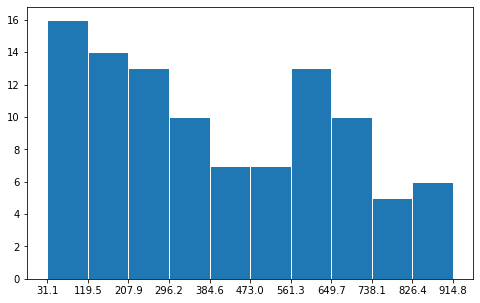

In [13]:
fig, ax = plt.subplots(figsize=(8, 5))
h_vals, h_bins, h_bars = ax.hist(df3["data1"], edgecolor="white")
ax.set_xticks(h_bins)
plt.show()

# Porównanie średniej i odchylenia standardowego

Jak możemy zauważyć, średnia z punktu 1 jest taka sama jak średnia z punktu 2, ponieważ `NaN` zastąpiliśmy średnią z wierszy bez brakujących wartości. Dodanie kolejnych wartości, które są średnią nie zmieni średniej. W punkcie 3 średnia jest różna od poprzednich punktów. Może być większa albo mniejsza w zależności od tego jak się wylosują wartości z podanego rozkładu. Jeśli wylosuje się więcej wartości większych od średniej bez brakujących wartości z punktu pierwszego to średnia wzrośnie, a jeśli mniejsze wartości to średnia się zmniejszy. Odchylenie standardowe w punkcie 2 jest mniejsze niż w punkcie 1, ponieważ dodaliśmy średnią za brakujące wartości. Zwiększona liczba wartości w środku rozkładu (średniej) zmniejsza nam odchylenie, ponieważ rozkład ten jest bardziej skupiony wokół tej średniej. W trzecim punkcie odchylenie standardowe jest większe niż w punkcie 2 ale może być mniejsze, równe bądź większe od odchylenia standardowego z punktu 1. Wszystko zależy od tego jakie wartości wylosujemy. Jeśli będzie dużo wartości z jednego bądź drugiego końca rozkładu to wartość będzie większa, a jeśli blisko średniej z poprzednich punktów, wtedy mniejsze niż w punkcie 1. Szanse są bardzo niewielkie, żeby odchylenie standardowe z punktu 3 było równe temu z punktu 2, ponieważ każda wartość zastępująca wartość brakującą musiałaby wylosować się jako średnia z poprzednich punktów.

# Porównanie histogramów

Każdy histogram przedstawia rozkład zmiennej podzielony na 10 przedziałów. Liczebności tych przedziałów różnią się w zależności od punktu. W pierwszym, w którym usunęliśmy wartości brakujące najliczniejszy jest przedział pierwszy `[31.1; 119.5]`. W drugim rozkładzie najliczniejszy jest przedział, który zawiera średnią, ponieważ wartości brakujące zastąpiliśmy właśnie tą średnią `[384.6; 473]`. W trzecim przypadku każdy z przedziałów może być najliczniejszy w zależności od wylosowanych liczb.